1- Considere uma cadeia circular composta por  átomos, cada um de massa , conectados por molas idênticas de constante elástica . O sistema está sujeito a condições de contorno ou seja a primeira massa está ligada a última massa. Em uma das simulações, introduza um defeito de massa:  substitua uma massa m2 (m2=5m)
 
Parâmetros
• Massas padrão:  m=1 kg
 • Constante elástica: k = 1 N/m
 • Tamanhos da cadeia: N = 100, 1000 e 10.000
• Defeito: massa igual a m2 = 5kg  (apenas em uma das simulações)
 
Tarefas
1. Cálculo das Frequências de Vibração
• Para cada valor de  (100, 1000, 10000), calcule as frequências naturais de vibração do sistema para:
• Cadeia homogênea (todas as massas iguais)
• Cadeia com defeito de massa no centro
2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores de  obtidos em cada caso.
• Compare os histogramas para diferentes tamanhos de cadeia e para a presença/ausência do defeito.
3. Deslocamentos Relativos (Modos Normais)
• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:
• Às cinco menores frequências (modos de baixa energia)
• Às cinco maiores frequências (modos de alta energia)
• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.
4. Análise e Comparação
• Analise como o tamanho da cadeia e a presença do defeito afetam:
• A distribuição das frequências (densidade de estados)
• Os padrões de deslocamento dos modos normais
• Discuta a localização dos modos associados ao defeito de massa.
Orientações para Implementação em Python
• O código deve ser bem documentado e comentado, facilitando o entendimento de cada etapa do processo.
• Utilize bibliotecas como `numpy` e `matplotlib` para cálculos e visualizações.
• Monte a matriz dinâmica do sistema e calcule seus autovalores e autovetores.
• Para grandes valores de , otimize o código para eficiência computacional.
• Disponibilize o código final em um repositório no GitHub e inclua o link no relatório.
 
Instruções para Entrega
 • A resposta deve ser enviada via Moodle devidamente comentada.
• Inclua todos os gráficos gerados (histogramas, modos normais, etc.) no arquivo de resposta, pois não será possível rodar todos os programas novamente para correção.
• Certifique-se de que cada gráfico esteja devidamente identificado e relacionado ao caso analisado.
 
Sugestão de Estrutura para a resposta
1. Introdução
• Breve explicação do modelo massa-mola e sua relevância para cadeias atômicas.
2. Metodologia
• Descrição do método numérico utilizado para calcular frequências e modos.
3. Resultados
• Histogramas das densidades de estados para cada caso.
• Gráficos dos deslocamentos relativos para os modos selecionados.
• Tabela comparativa dos principais resultados.
4. Discussão
• Interpretação dos efeitos do tamanho da cadeia e do defeito de massa.
• Observações sobre a localização dos modos e possíveis aplicações.
5. Conclusão
• Síntese dos principais achados.
Observação: Comente o código de forma clara, disponibilize o link do GitHub e anexe todos os gráficos no Moodle para garantir a avaliação completa.
Texto de resposta Questão 1



















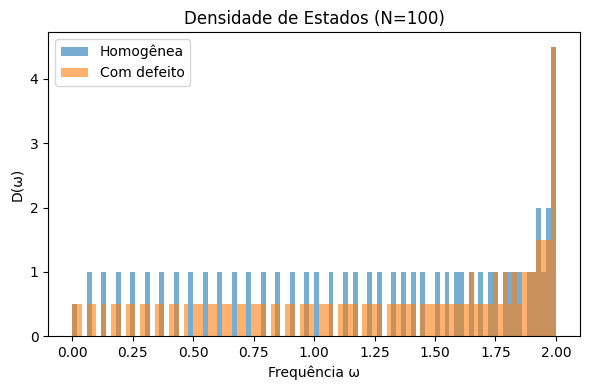

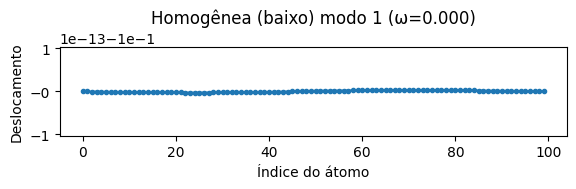

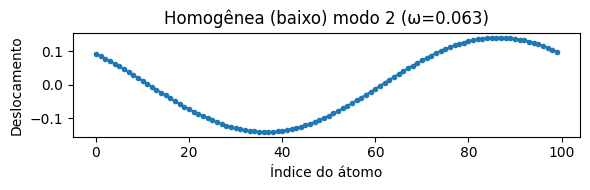

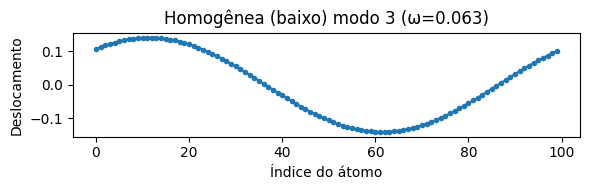

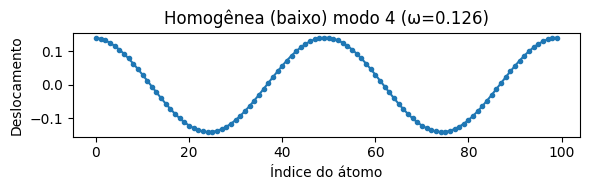

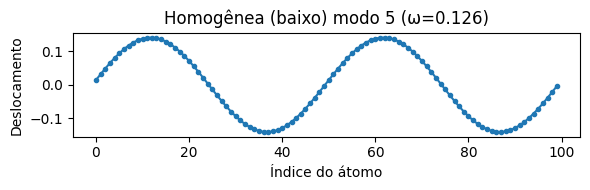

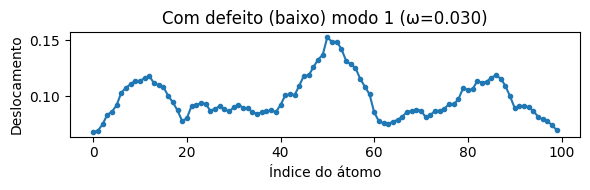

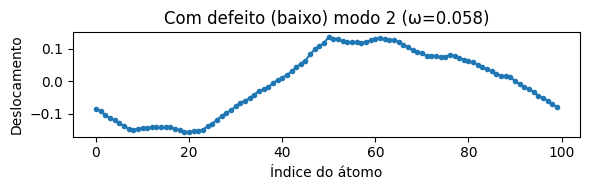

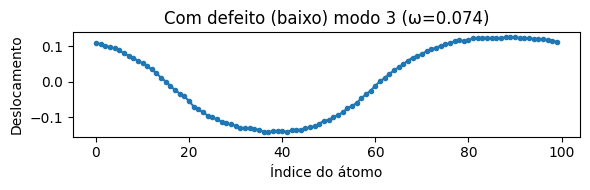

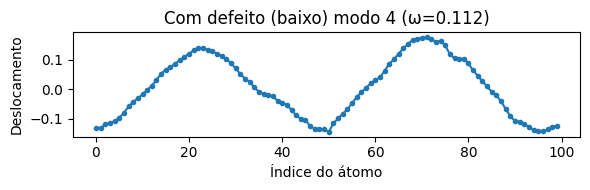

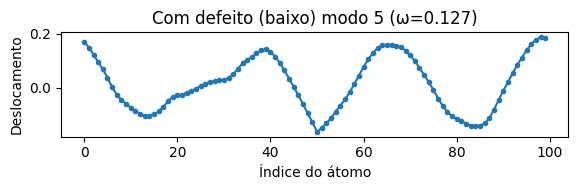

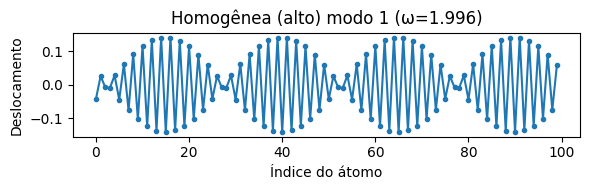

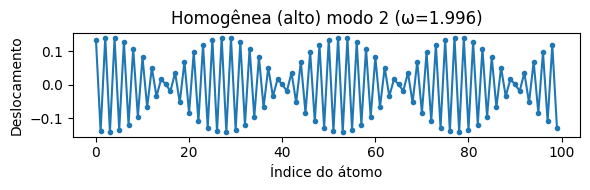

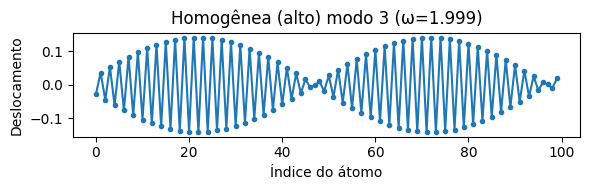

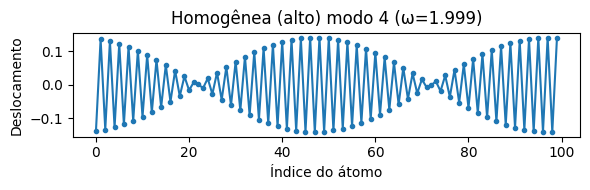

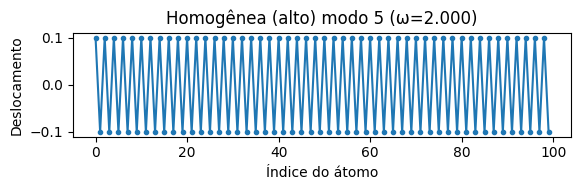

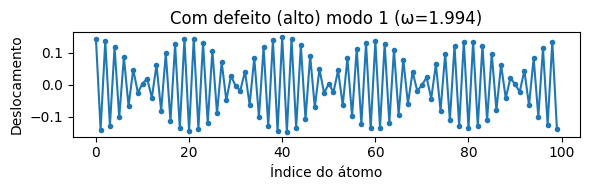

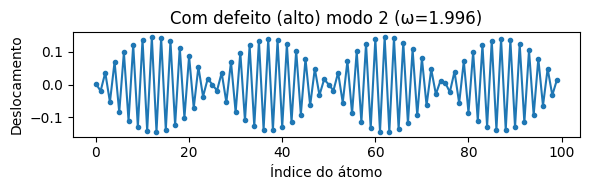

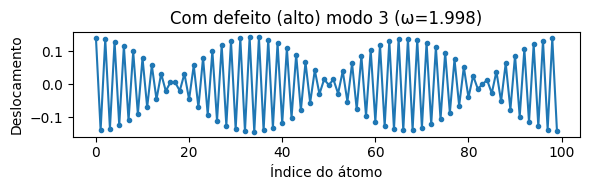

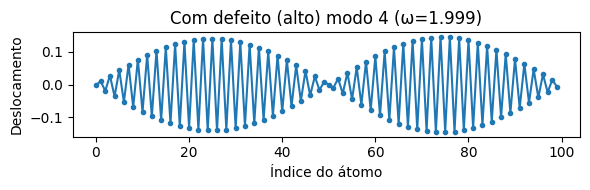

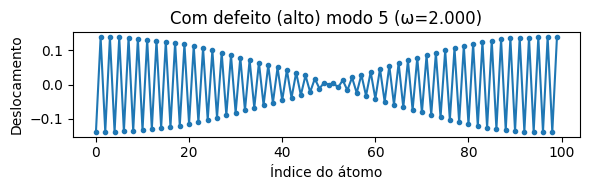

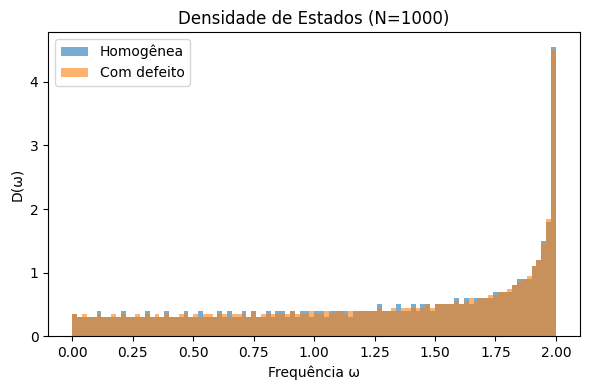

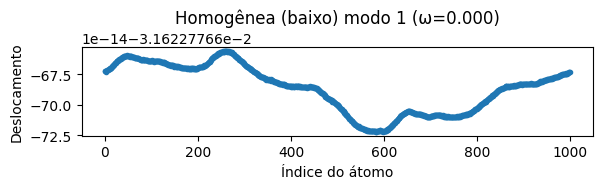

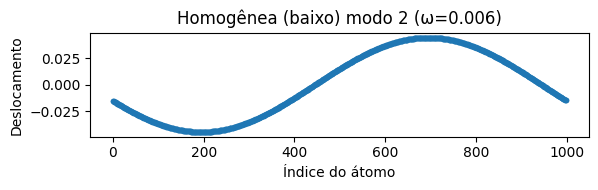

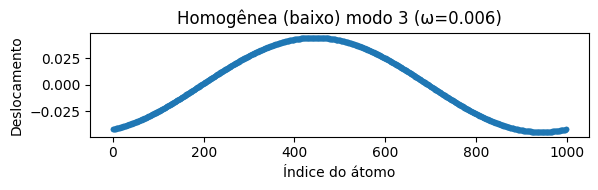

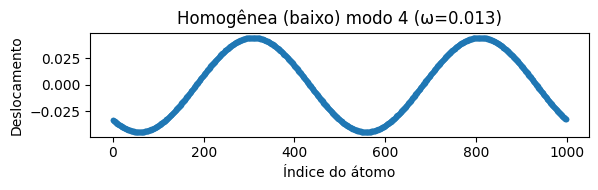

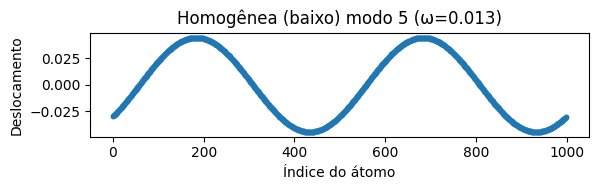

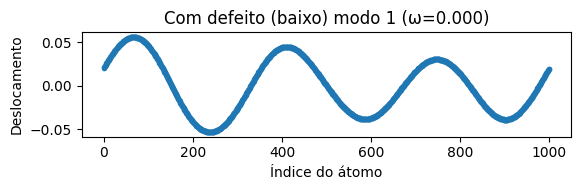

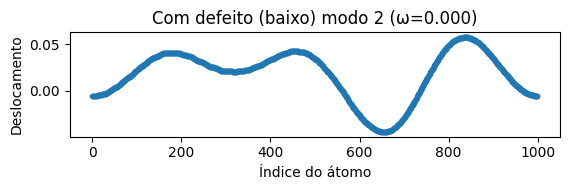

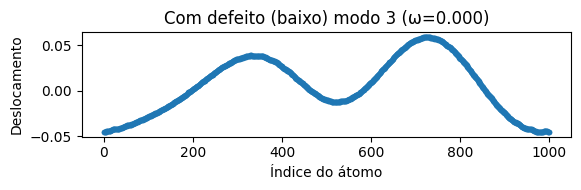

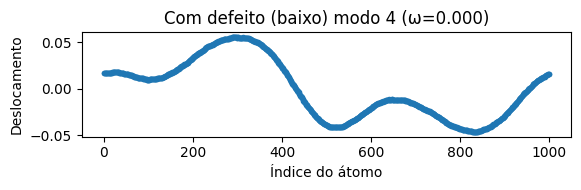

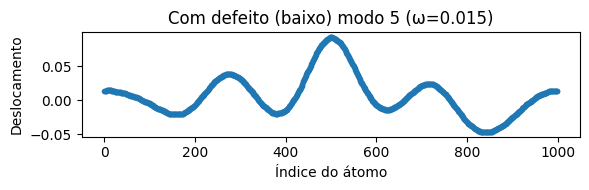

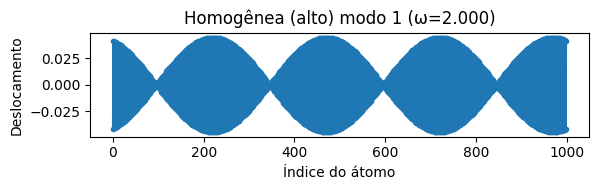

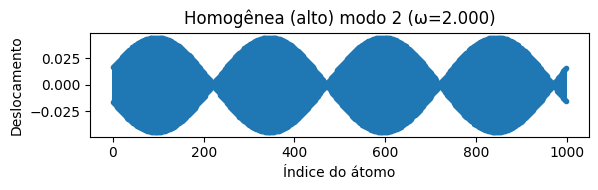

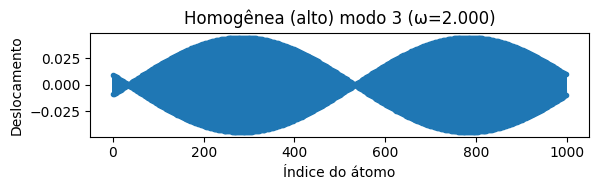

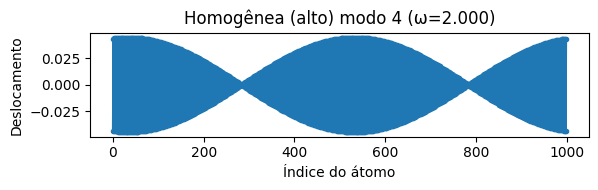

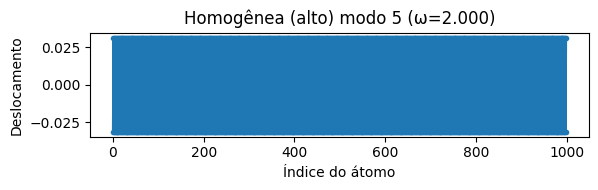

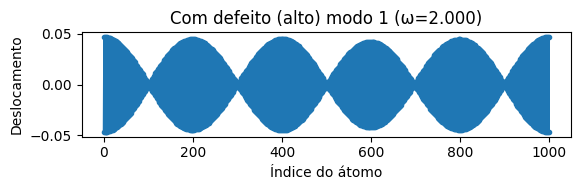

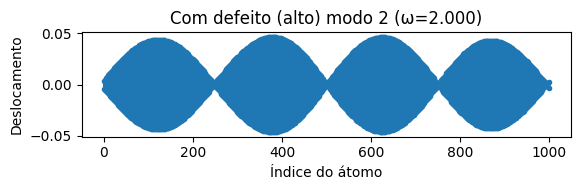

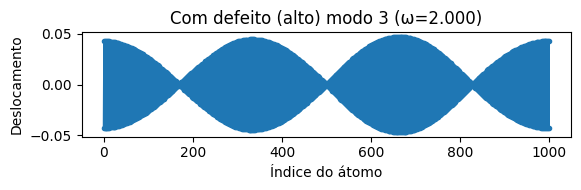

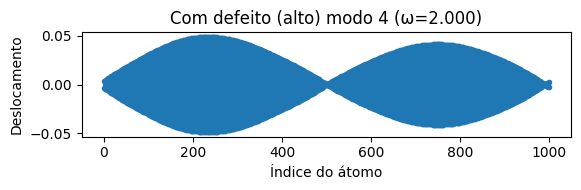

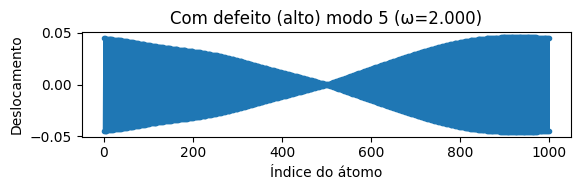

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

def montar_matrizes(N, m=1.0, k=1.0, defeito=False, m2=5.0):
    vet_masas = np.ones(N) * m
    if defeito:
        vet_masas[N // 2] = m2
    diag_principal = 2 * k * np.ones(N)
    diag_secundaria = -k * np.ones(N - 1)
    K = diags(
        diagonals=[diag_principal, diag_secundaria, diag_secundaria],
        offsets=[0, -1, 1],
        shape=(N, N),
        format='csr'
    )
    K[0, N - 1] = -k
    K[N - 1, 0] = -k
    return vet_masas, K

def calcular_frequencias(N, defeito=False):
    vet_masas, K = montar_matrizes(N, defeito=defeito)
    Minv = diags(1.0 / vet_masas)
    A = Minv.dot(K)
    if N <= 2000:
        autoval2 = np.linalg.eigvalsh(A.toarray())
    else:
        autoval2, _ = eigsh(A, k=N-2, which='SM')
        autoval2 = np.concatenate([autoval2, [4.0, 4.0]])
    autoval2 = np.clip(autoval2, 0, None)
    return np.sort(np.sqrt(autoval2))

def plotar_densidade(freqs_hom, freqs_def, N, bins=100):
    plt.figure(figsize=(6,4))
    plt.hist(freqs_hom, bins=bins, density=True, alpha=0.6, label='Homogênea')
    plt.hist(freqs_def, bins=bins, density=True, alpha=0.6, label='Com defeito')
    plt.title(f'Densidade de Estados (N={N})')
    plt.xlabel('Frequência ω')
    plt.ylabel('D(ω)')
    plt.legend()
    plt.tight_layout()
    plt.show()

def calcular_modos(N, defeito=False, num_modos=5, altos=False):
    vet_masas, K = montar_matrizes(N, defeito=defeito)
    Minv = diags(1.0 / vet_masas)
    A = Minv.dot(K)
    tipo = 'LM' if altos else 'SM'
    autoval2, autovet = eigsh(A, k=num_modos, which=tipo)
    autoval2 = np.clip(autoval2, 0, None)
    freqs = np.sqrt(autoval2)
    idx = np.argsort(freqs)
    return freqs[idx], autovet[:, idx]

def plotar_modos(vetores, freqs, N, titulo):
    x = np.arange(N)
    for i in range(vetores.shape[1]):
        plt.figure(figsize=(6,2))
        plt.plot(x, vetores[:, i], '-o', markersize=3)
        plt.title(f'{titulo} modo {i+1} (ω={freqs[i]:.3f})')
        plt.xlabel('Índice do átomo')
        plt.ylabel('Deslocamento')
        plt.tight_layout()
        plt.show()

if __name__ == '__main__':
    Ns = [100, 1000, 10000]
    for N in Ns:
        freqs_hom = calcular_frequencias(N, defeito=False)
        freqs_def = calcular_frequencias(N, defeito=True)
        plotar_densidade(freqs_hom, freqs_def, N)
        low_f_h, low_v_h = calcular_modos(N, defeito=False, num_modos=5, altos=False)
        low_f_d, low_v_d = calcular_modos(N, defeito=True, num_modos=5, altos=False)
        plotar_modos(low_v_h, low_f_h, N, 'Homogênea (baixo)')
        plotar_modos(low_v_d, low_f_d, N, 'Com defeito (baixo)')
        hi_f_h, hi_v_h = calcular_modos(N, defeito=False, num_modos=5, altos=True)
        hi_f_d, hi_v_d = calcular_modos(N, defeito=True, num_modos=5, altos=True)
        plotar_modos(hi_v_h, hi_f_h, N, 'Homogênea (alto)')
        plotar_modos(hi_v_d, hi_f_d, N, 'Com defeito (alto)')
